In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pickle

from pairwise_network import env, wandb_api, labels
from pairwise_network.analyse import activation


Set colormap

Get run

In [3]:
# run = wandb_api.run_id_to_run('32g2fdrv')
# run = wandb_api.run_id_to_run('2xfj6vve')
run = wandb_api.run_id_to_run('3d6y7gfh')
cfg = wandb_api.run_to_cfg(run)

In [4]:
prune_df = wandb_api.run_to_prune_df(run)

In [5]:
file_path = wandb_api.run_to_file_path(run, env.act_dist_filename)
act_dist_list = pickle.load(open(file_path, 'rb'))

Text(0.5, 0, 'prune iteration, validation correlation, sparsity')

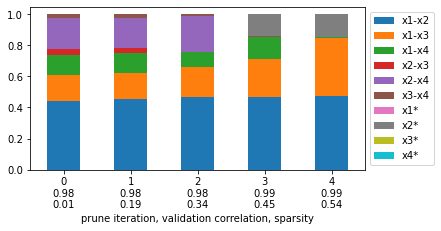

In [6]:
# fig, ax = plt.subplots(figsize=(10, 3))
fig, ax = plt.subplots(figsize=(6, 3))

activation.plot_act_dist(act_dist_list[1:], ax)  # Skipp iteration 0
f = labels.sympy_func_to_latex(cfg["art_function"])
# ax.set_title(f'$y={f}$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

n_iterations = len(ax.get_xticks())
xtick_labels = list()
xtick_pos = np.arange(n_iterations)
for i in range(n_iterations):
    n = int(prune_df['prune_iteration'].iloc[i])
    corr = round(prune_df['valid_corr'].iloc[i], 2)
    # loss = round(prune_df['valid_loss'].iloc[i], 2)
    sparsity = round(prune_df['global_sparsity'].iloc[i], 2)
    xtick_labels.append(f'{n}\n{corr:.2f}\n{sparsity:.2f}')

ax.set_xticks(xtick_pos)
ax.set_xticklabels(xtick_labels)
ax.set_xlabel('prune iteration, validation correlation, sparsity')

In [7]:
fig.tight_layout()
fig.savefig(os.path.join(env.results_dir, 'art-snd-prune-precession-3.pdf'))